In [ ]:
import math
class Value:
  def __init__(self, data, _children=[], _op='', label=''):
    self.data = data
    self._prev = _children
    # backprop -  when initialise no gradient, its when u do some operation u have it
    self._backward = lambda:None
    self._op = _op
    self.label = label
    self.grad = 0.0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self,other):
    out =  Value(self.data + other.data, [self, other], _op='+')
    def _backward():
      self.grad = out.grad
      other.grad = out.grad
    
    out._backward = _backward
    return out
  def __mul__(self,other):
    out = Value(self.data * other.data, [self, other], _op='*')
    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, [self],'tanh')
    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward

    return out

In [ ]:
a = Value(3, label='a')

In [ ]:
b = Value(2,label='b')
b

Value(data=2)

In [ ]:
# a + b 
# eq of
a.__add__(b)

Value(data=5)

In [ ]:
a*b

Value(data=6)

In [ ]:
c = Value(1,label='c')

In [ ]:
e = a*b
e.label = 'e'
d = e + c
d
d.label = 'd'

In [ ]:
d._prev

[Value(data=6), Value(data=1)]

In [ ]:
d._op

'+'

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

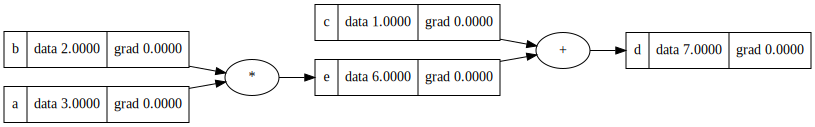

In [ ]:
draw_dot(d)

In [ ]:
L = d + e

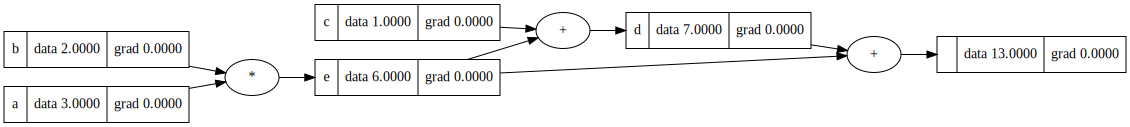

In [ ]:
draw_dot(L)

In [ ]:
L.grad = 1

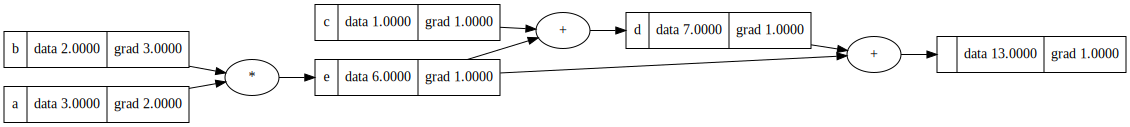

In [ ]:
draw_dot(L)

In [ ]:
L._backward()

In [ ]:
c._backward()

In [ ]:
c.grad

0.0

In [ ]:
e._backward()